## Demonstrating Image compression using PCA

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import  matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from sklearn.decomposition import PCA,IncrementalPCA

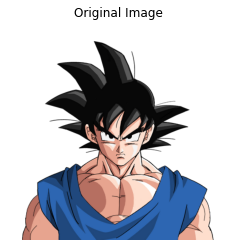

In [2]:
image_raw = imread('goku potrait.png');

# image_sum = image_raw.sum(axis=2)
# image_bw = image_sum/image_sum.max()
# image_raw = image_bw

gray_chan=False
if (image_raw.ndim) ==2 :
    gray_chan = True

if not gray_chan:
    img=[]
    for i in range(image_raw.shape[-1]):
        img.append(image_raw[:,:,i])
else:
    img = image_raw

plt.imshow(image_raw)
plt.title('Original Image')
plt.axis('off')
plt.show()

Number of componenets with more than 95% of varience :14


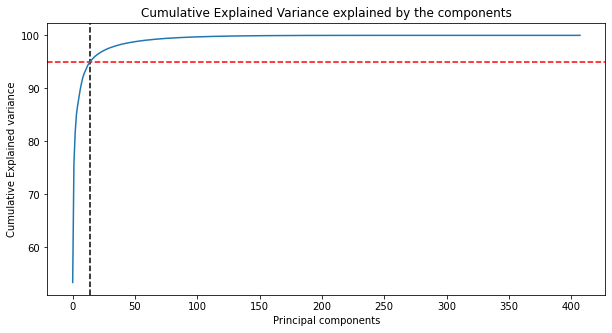

In [3]:
pca = PCA()
pca.fit(img[0])

#cumulative variance
cum_varience = np.cumsum(pca.explained_variance_ratio_)*100

#Get the number of PC whose varience > 95
k = np.argmax(cum_varience > 95)
print("Number of componenets with more than 95% of varience :"+str(k))

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(cum_varience)

We see that the sum of first 14 components out of 400+ retains about 95 % of varience in the original image.  

Below we find the number of required components for  which our image will contain 95%,98%,99% of variences of the original image

In [21]:
var = [95,98,99]
pca= PCA()

components=[]
for v in var:
    cum_var_list =[]
    for i in range(len(img)):
        pca.fit(img[i])
        cum_varience = np.cumsum(pca.explained_variance_ratio_)*100
        cum_var_list.append(np.argmax(cum_varience>v))
    cum_var_list= np.asarray(cum_var_list)
    components.append(cum_var_list.max())

for q,v in zip(components,var):
    print("Optimum components for retaining {} % varience : {}".format(v,q))

Optimum components for retaining 95 % varience : 14
Optimum components for retaining 98 % varience : 35
Optimum components for retaining 99 % varience : 56


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


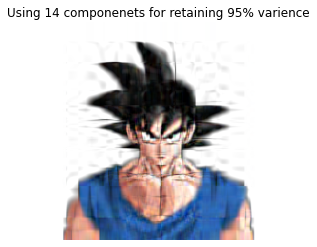

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


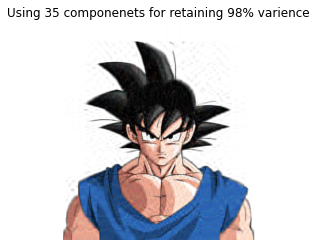

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


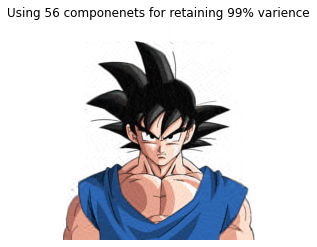

In [22]:
#We now plot the compressed images with the required variences and its no of cumulative componnets 

for k,v in zip(components,var):
    ipca = IncrementalPCA(n_components = k);
    plt.title('Using {} componenets for retaining {}% varience'.format(k,v))
    if not gray_chan:
        image_reconstructed=[]
        for i in range(len(img)):
            x = ipca.inverse_transform(ipca.fit_transform(img[i]));
            image_reconstructed.append(x);
        im=np.stack(tuple(image_reconstructed),axis=-1);    
    else:
        im = ipca.inverse_transform(ipca.fit_transform(img));
    plt.imshow(im);
    plt.axis('off')
    plt.show();

## Conclusion
We see that retaning 99% of the original image varience gives us an ouput very simillar to the original image while only using about 56 cumulative components out of 400+